In [1]:
import wave
import base64
from PIL import Image
import io
from cryptography.fernet import Fernet

In [4]:
# Creating decryptor using key generated during encryption
key = (b'zm7vT7SsWq5mW3djikNaAhirHl5G3GdydtVwxPoSAAM=')
decryptor = Fernet(key)

In [5]:
# Creating function to decode the encrypted string from the audio file
def decode():
    print("\nDecoding Starts..")
    # Importing audio file which contains ancoded and encrypted data 
    audio = wave.open("EncrypedStego.wav", mode='rb')
    # Reading frames of audio file into byte array for decoding
    frame_bytes = bytearray(list(audio.readframes(audio.getnframes())))
    # Extract the LSB of each byte
    extracted = [frame_bytes[i] & 1 for i in range(len(frame_bytes))]
    # Convert byte array back to string
    string = "".join(chr(int("".join(map(str,extracted[i:i+8])),2)) for i in range(0,len(extracted),8))
    # Splitting data at '###' which denotes the start of filler characters (dummy data)
    decoded = string.split("###")[0]
    audio.close()
    print("\nDecoding Completed..")
    # Returning the extracted string
    return decoded

In [6]:
# Saving decoded string in a variable
decode_str = decode()


Decoding Starts..

Decoding Completed..


In [7]:
# Converting decoded string back to bytes format
decoded_str = str.encode(decode_str)
decoded_str = decoded_str[2:-1]

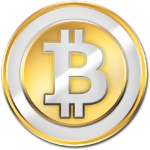

In [9]:
# Decrypting bytes string using decrypter
decrypted_str = decryptor.decrypt(decoded_str)
f = io.BytesIO(base64.b64decode(decrypted_str))
pilimage = Image.open(f)
pilimage